In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Import the historic weather data as dataframe Weather
Weather = pd.read_csv('../Data assignment 1/Weather 2022.csv', delimiter=',')

In [3]:
# Check the dataframe
Weather.head()

,ts,Observed maximum temperature past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/temp_max_past1h/06197 | 406464,Observed minimum temperature past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/temp_min_past1h/06193 | 406608,Observed mean humidity past hour at Copenhagens Airport - DMI station 06180 | 9F7J/JJ/7V/DMI/metObs/humidity_past1h/06180 | 798221,Observed mean humidity past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/humidity_past1h/06193 | 406576,Observed maximum temperature past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/temp_max_past1h/06193 | 406592,Observed accumulated precipitation the past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/precip_past1h/06197 | 406528,Observed mean wind speed the past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/wind_speed_past1h/06197 | 406512,Observed mean intensity of global radiation in the latest hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/radia_glob_past1h/06193 | 406672,Observed mean intensity of global radiation in the latest hour at Kbenhavn Toldbod - DMI station 06187 | 9F7J/MH/QX/DMI/metObs/radia_glob_past1h/06187 | 406688,...,Observed mean wind speed the past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/wind_speed_past1h/06193 | 406640,Observed accumulated precipitation the past hour at DMI - DMI station 06184 | 9FJP/PH/86/DMI/metObs/precip_past1h/06184 | 406800,Observed mean wind direction the past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/wind_dir_past1h/06197 | 406496,Observed accumulated precipitation the past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/precip_past1h/06193 | 406656,Observed mean wind speed the past hour at Copenhagens Airport - DMI station 06180 | 9F7J/JJ/7V/DMI/metObs/wind_speed_past1h/06180 | 798253,Observed accumulated precipitation the past hour at Copenhagens Airport - DMI station 06180 | 9F7J/JJ/7V/DMI/metObs/precip_past1h/06180 | 798269,Observed mean wind direction the past hour at Copenhagens Airport - DMI station 06180 | 9F7J/JJ/7V/DMI/metObs/wind_dir_past1h/06180 | 798237,Observed mean intensity of global radiation in the latest hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/radia_glob_past1h/06197 | 406544,Observed mean wind direction the past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/wind_dir_past1h/06193 | 406624,Observed mean temperature past hour at Copenhagens Airport - DMI station 06180 | 9F7J/JJ/7V/DMI/metObs/temp_mean_past1h/06180 | 798205
0,2022-01-01 00:00:00,7.3,5.5,NaN,100.0,5.7,0.0,6.9,1.0,0.0,...,8.2,0.0,267.0,0.0,NaN,NaN,NaN,0.0,258.0,NaN
1,2022-01-01 01:00:00,7.3,5.4,NaN,100.0,5.7,0.0,5.6,1.0,0.0,...,9.3,0.0,253.0,0.0,NaN,NaN,NaN,0.0,252.0,NaN
2,2022-01-01 02:00:00,7.0,5.1,NaN,100.0,5.9,0.0,6.6,1.0,0.0,...,9.3,0.0,264.0,0.0,NaN,NaN,NaN,0.0,252.0,NaN
3,2022-01-01 03:00:00,6.9,5.3,NaN,100.0,5.6,0.0,5.9,1.0,0.0,...,8.5,0.0,270.0,0.0,NaN,NaN,NaN,0.0,259.0,NaN
4,2022-01-01 04:00:00,7.2,5.2,NaN,100.0,5.5,0.0,5.4,1.0,0.0,...,7.1,0.0,288.0,0.0,NaN,NaN,NaN,0.0,258.0,NaN


In [4]:
# Print the info for the dataframe, to check
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8650 entries, 0 to 8649
Data columns (total 30 columns):
 #   Column                                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                                           --------------  -----  
 0   ts                                                                                                                                                               8650 non-null   object 
 1   Observed maximum temperature past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/temp_max_past1h/06197 | 406464                                         8457 non-null   float64
 2   Observed minimum temperature past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/temp_min_past1h/06193 | 40

Based on the location of the chosen wind park, the Nex - DMI weather station is closed and was selected for further analysis. 

In [5]:
# Filter columns that contain 'Nex' in their column names
nex_columns = [col for col in Weather.columns if 'Nex' in col]

# Include 'ts' column in the list of columns to keep
columns_to_keep = ['ts'] + nex_columns

# Create a new DataFrame with only the columns to keep
Weather = Weather[columns_to_keep]

In [6]:
replace_names = {'Observed maximum temperature past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/temp_max_past1h/06197 | 406464': 'Maximum temperature', 
                 'Observed accumulated precipitation the past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/precip_past1h/06197 | 406528': 'Accumulated percipitation',
                 'Observed mean wind speed the past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/wind_speed_past1h/06197 | 406512': 'Mean wind speed',
                 'Observed minimum temperature past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/temp_min_past1h/06197 | 406480': 'Minimum temperature',
                 'Observed mean temperature past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/temp_mean_past1h/06197 | 406432': 'Mean temperature', 
                 'Observed mean humidity past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/humidity_past1h/06197 | 406448': 'Mean humidity',
                 'Observed mean wind direction the past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/wind_dir_past1h/06197 | 406496': 'Mean wind direction',
                 'Observed mean intensity of global radiation in the latest hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/radia_glob_past1h/06197 | 406544': 'Mean intensity global radiation'
}

In [7]:
# Rename columns using the replace_names dictionary
Weather = Weather.rename(columns=replace_names)

In [11]:
# Check for duplicates. If any, these have to be removed
Weather.duplicated().sum()

0

In [12]:
# Set the timestamped column to the datetime format
Weather['datetime'] = pd.to_datetime(Weather['ts'])
# Set the 'datetime' column as the index of the DataFrame. 
Weather.set_index('datetime', inplace=True)

In [13]:
# Check the dataframe
Weather.head()

,ts,Maximum temperature,Accumulated percipitation,Mean wind speed,Minimum temperature,Mean temperature,Mean humidity,Mean wind direction,Mean intensity global radiation
datetime,,,,,,,,,
2022-01-01 00:00:00,2022-01-01 00:00:00,7.3,0.0,6.9,7.0,7.2,99.0,267.0,0.0
2022-01-01 01:00:00,2022-01-01 01:00:00,7.3,0.0,5.6,6.6,6.8,99.0,253.0,0.0
2022-01-01 02:00:00,2022-01-01 02:00:00,7.0,0.0,6.6,6.6,6.8,99.0,264.0,0.0
2022-01-01 03:00:00,2022-01-01 03:00:00,6.9,0.0,5.9,6.5,6.7,98.0,270.0,0.0
2022-01-01 04:00:00,2022-01-01 04:00:00,7.2,0.0,5.4,6.5,6.8,98.0,288.0,0.0
...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,10.4,0.0,9.8,9.8,10.1,93.0,221.0,0.0
2022-12-31 20:00:00,2022-12-31 20:00:00,10.6,0.0,8.5,9.9,10.2,94.0,227.0,0.0
2022-12-31 21:00:00,2022-12-31 21:00:00,10.6,0.3,8.6,9.7,10.1,96.0,223.0,0.0


In [14]:
# Drop column 'ts' since it has been replaced by the datetime index
Weather.drop(columns=['ts'], inplace=True)

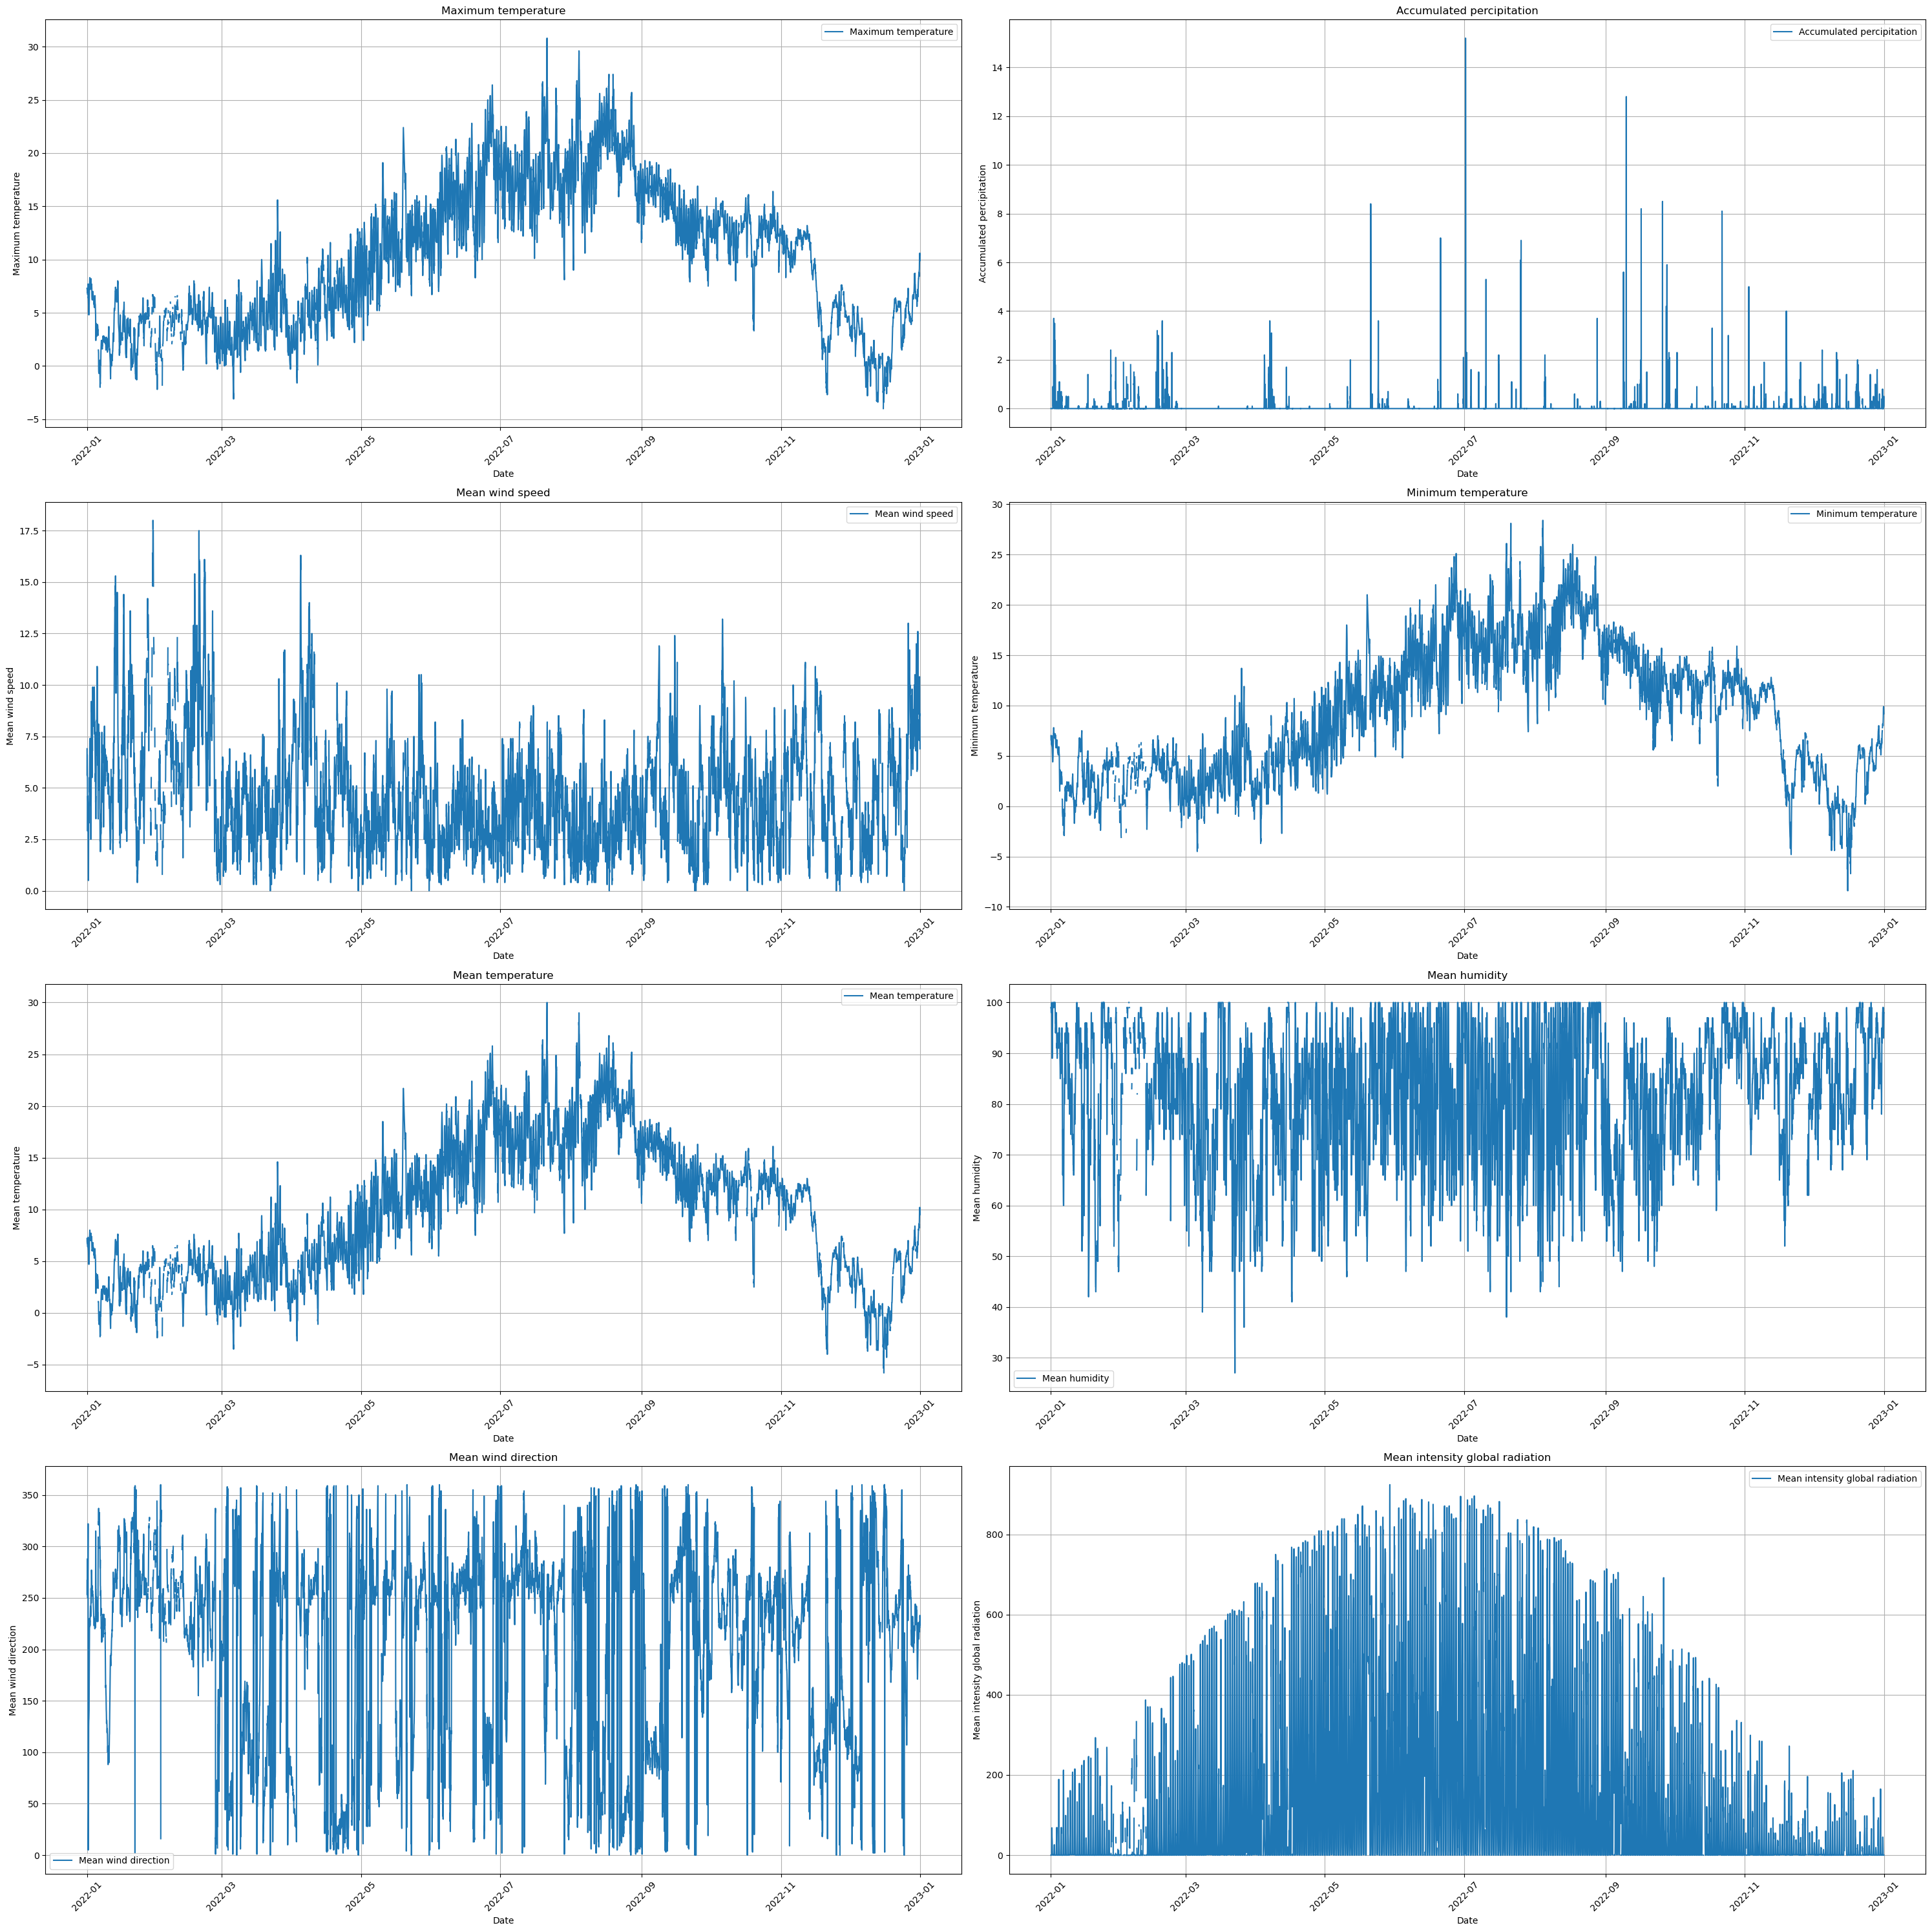

In [16]:
# Create a figure with subplots arranged in 3 rows and 2 columns. 
# figsize sets the overall figure size to be larger to improve visibility
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(30, 30))  
# Flatten the axes array into a 1D array for easier iteration
axes = axes.flatten()

for i, column in enumerate(Weather):
    axes[i].plot(Weather.index, Weather[column], label=column)
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(column)
    axes[i].legend()
    axes[i].grid()
# Rotate the xlabels for clarity
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [17]:
Weather.describe()

,Maximum temperature,Accumulated percipitation,Mean wind speed,Minimum temperature,Mean temperature,Mean humidity,Mean wind direction,Mean intensity global radiation
count,8457.000000,8452.000000,8449.000000,8396.000000,8402.000000,8464.000000,8445.000000,8443.000000
mean,10.208017,0.066671,4.674139,9.241603,9.719222,81.525047,203.617644,143.551463
std,6.592869,0.445228,2.751821,6.487595,6.531386,13.288528,91.954515,223.669307
min,-4.000000,0.000000,0.000000,-8.400000,-5.800000,27.000000,0.000000,0.000000
25%,4.500000,0.000000,2.600000,3.800000,4.200000,73.000000,122.000000,0.000000
50%,10.300000,0.000000,4.200000,9.400000,9.800000,83.000000,236.000000,8.000000
75%,15.100000,0.000000,6.200000,14.000000,14.500000,92.000000,269.000000,212.000000
max,30.800000,15.200000,18.000000,28.400000,30.000000,100.000000,360.000000,924.000000


This dataframe has 8650 rows, when it should have one row for every hour in the year. The code below is used to figure out which hours are missing and to resolve this issue. 

In [18]:
# Datetime needs to be used as column, so the index has to be reset
Weather.reset_index(inplace=True)
# Ensure the datetime column is in datetime format
Weather['datetime'] = pd.to_datetime(Weather['datetime'])

# Extract month and year from datetime
Weather['Month'] = Weather['datetime'].dt.strftime('%B')
Weather['Year'] = Weather['datetime'].dt.year

# Count the number of data points per month
actual_counts = Weather.groupby(['Year', 'Month']).size().reset_index(name='Actual Count')

# Create a DataFrame with expected counts
months_in_year = {
    'January': 31,
    'February': 28,  # 2022 was not a leap year
    'March': 31,
    'April': 30,
    'May': 31,
    'June': 30,
    'July': 31,
    'August': 31,
    'September': 30,
    'October': 31,
    'November': 30,
    'December': 31
}

# Generate expected counts for each month
expected_counts = []
for year in actual_counts['Year'].unique():
    for month, days in months_in_year.items():
            expected_counts.append({'Year': year, 'Month': month, 'Expected Count': days * 24})  # 24 hours

# Create expected counts DataFrame
expected_counts_df = pd.DataFrame(expected_counts)

# Merge actual and expected counts
summary_table = pd.merge(expected_counts_df, actual_counts, on=['Year', 'Month'], how='left')
summary_table

,Year,Month,Expected Count,Actual Count
0,2022,January,744,743
1,2022,February,672,670
2,2022,March,744,737
3,2022,April,720,708
4,2022,May,744,722
5,2022,June,720,713
6,2022,July,744,718
7,2022,August,744,737
8,2022,September,720,716
9,2022,October,744,743


The table above shows that there are a few hours missing every month, explaining the difference of the Weather dataframe only containing 8650 rows. 

In [19]:
Weather['datetime'] = pd.to_datetime(Weather['datetime'])

# Create a complete range of timestamps for the period covered in the weather dataframe
# Set the frequency to hourly
start_time = Weather['datetime'].min().replace(minute=0, second=0, microsecond=0)
end_time = Weather['datetime'].max().replace(minute=0, second=0, microsecond=0)

# Generate the complete time range
full_time_range = pd.date_range(start=start_time, end=end_time, freq='H')

# Find the missing timestamps by comparing the complete range with the actual timestamps
missing_hours = full_time_range.difference(Weather['datetime'])

# Create a DataFrame to display missing hours
missing_hours_df = pd.DataFrame(missing_hours, columns=['Missing Datetime'])

In [20]:
# Print the missing hours
missing_hours_df
# 8760-8650 = 110, so these results are correct

,Missing Datetime
0,2022-01-19 09:00:00
1,2022-02-25 18:00:00
2,2022-02-27 06:00:00
3,2022-03-01 20:00:00
4,2022-03-03 05:00:00
...,...
105,2022-12-22 07:00:00
106,2022-12-22 12:00:00
107,2022-12-22 16:00:00
108,2022-12-22 17:00:00


In [21]:
# Include the missing hours in the original weather dataframe
Weather = pd.concat([missing_hours_df, Weather], ignore_index=True)

In [22]:
# Weather.drop(columns=['Missing Datetime'], inplace=True)
Weather['datetime'] = Weather['datetime'].fillna(Weather['Missing Datetime'])

In [23]:
Weather.sort_values(by='datetime', inplace=True)

In [24]:
Weather.drop(columns=['Missing Datetime', 'Month', 'Year'], inplace=True)

In [25]:
# Check the amount of missing values per variable
Weather.isna().sum()

datetime                             0
Maximum temperature                303
Accumulated percipitation          308
Mean wind speed                    311
Minimum temperature                364
Mean temperature                   358
Mean humidity                      296
Mean wind direction                315
Mean intensity global radiation    317
dtype: int64

In [26]:
# Check if all variables are the correct datatype
Weather.dtypes

datetime                           datetime64[ns]
Maximum temperature                       float64
Accumulated percipitation                 float64
Mean wind speed                           float64
Minimum temperature                       float64
Mean temperature                          float64
Mean humidity                             float64
Mean wind direction                       float64
Mean intensity global radiation           float64
dtype: object

In [27]:
# Set the timestamp as index
Weather.set_index('datetime', inplace=True)

In [28]:
Weather.tail()

,Maximum temperature,Accumulated percipitation,Mean wind speed,Minimum temperature,Mean temperature,Mean humidity,Mean wind direction,Mean intensity global radiation
datetime,,,,,,,,
2022-12-31 19:00:00,10.4,0.0,9.8,9.8,10.1,93.0,221.0,0.0
2022-12-31 20:00:00,10.6,0.0,8.5,9.9,10.2,94.0,227.0,0.0
2022-12-31 21:00:00,10.6,0.3,8.6,9.7,10.1,96.0,223.0,0.0
2022-12-31 22:00:00,9.9,0.5,7.9,9.6,9.8,98.0,233.0,0.0
2022-12-31 23:00:00,9.9,0.1,6.9,9.2,9.5,98.0,228.0,0.0


In [29]:
# Fill the missing values by taking the average of the hour before and after. 
# It is assumed that this is a suitable method because the weather circumstance usually does not change that extremely in 2 hours
for column in Weather.columns:
    # Calculate the mean of the rows above and below for each nan-value
    for index in range(len(Weather)):
        if pd.isna(Weather.iloc[index][column]):
            # Check the row above
            above = Weather.iloc[index - 1][column] if index > 0 else np.nan
            # Check the row below
            below = Weather.iloc[index + 1][column] if index < len(Weather) - 1 else np.nan
            # Calculate the mean if both values are not a NaN value
            mean_value = np.nanmean([above, below])
            Weather.iloc[index, Weather.columns.get_loc(column)] = mean_value

In [30]:
# Recheck the missing values
Weather.isna().sum()

Maximum temperature                0
Accumulated percipitation          0
Mean wind speed                    0
Minimum temperature                0
Mean temperature                   0
Mean humidity                      0
Mean wind direction                0
Mean intensity global radiation    0
dtype: int64

In [31]:
# Check the dataframe to make sure there are no weird values due to the solving of the missing values
Weather

,Maximum temperature,Accumulated percipitation,Mean wind speed,Minimum temperature,Mean temperature,Mean humidity,Mean wind direction,Mean intensity global radiation
datetime,,,,,,,,
2022-01-01 00:00:00,7.3,0.0,6.9,7.0,7.2,99.0,267.0,0.0
2022-01-01 01:00:00,7.3,0.0,5.6,6.6,6.8,99.0,253.0,0.0
2022-01-01 02:00:00,7.0,0.0,6.6,6.6,6.8,99.0,264.0,0.0
2022-01-01 03:00:00,6.9,0.0,5.9,6.5,6.7,98.0,270.0,0.0
2022-01-01 04:00:00,7.2,0.0,5.4,6.5,6.8,98.0,288.0,0.0
...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,10.4,0.0,9.8,9.8,10.1,93.0,221.0,0.0
2022-12-31 20:00:00,10.6,0.0,8.5,9.9,10.2,94.0,227.0,0.0
2022-12-31 21:00:00,10.6,0.3,8.6,9.7,10.1,96.0,223.0,0.0


In [32]:
# Export the dataframe to csv
Weather.to_csv('../Data assignment 1/Weather data.csv', index=True)  